In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [13]:
#Read `myopia.csv` into a Pandas DataFrame.
file = "./myopia.csv"
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [28]:
#Remove the "MYOPIC" column from the dataset.
data = df.drop("MYOPIC", axis =1)
labels = df["MYOPIC"]

In [29]:
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [30]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values
data_scaled = StandardScaler().fit_transform(data)
data_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [31]:
#Perform dimensionality reduction with PCA.
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_scaled)
data_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

Number of components dropped from 14 to 10. Used "n_components = 0.90" to preserve 90% of data

In [32]:
df_data_pca = pd.DataFrame(
    data=data_pca, columns=["PC1", "PC2", "PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
)
df_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [33]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(df_data_pca)

tsne_features.shape

c:\Users\calum\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

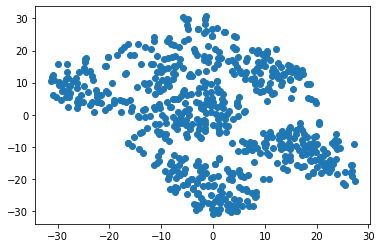

In [47]:
#Create a scatter plot of the t-SNE output.
data['x'] = tsne_features[:,0]
data['y'] = tsne_features[:,1]


plt.scatter(data['x'],data['y'])
plt.show()

There does not appear to be distinct clusters in this plot.

c:\Users\calum\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


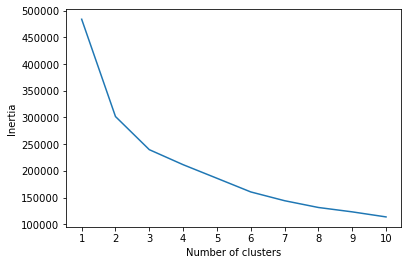

In [48]:
#Create an elbow plot to identify the best number of clusters.

inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Elbow curve does not show any distict value of k which "flattens" the curve. I therefore conclude that there is no way of clustering this data accurately with K-Means.

In [50]:
labels.unique()

array([1, 0], dtype=int64)

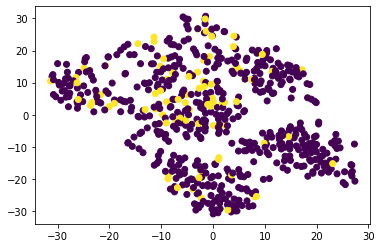

In [51]:
plt.scatter(data['x'],data['y'],c=labels)
plt.show()

This plot shows the data from the TSNE step, but now with colour set to the labels from the original data. It clearly shows that the data points are mixed and reinforces the belief that the data cannot be clustered.